### Importing the required libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Computing the missing value percentage in data.

In [4]:
for i in data.columns:
    prct_missing = np.mean(data[i].isnull())
    print("{} = {}%".format(i,prct_missing*100))

longitude = 0.0%
latitude = 0.0%
housing_median_age = 0.0%
total_rooms = 0.0%
total_bedrooms = 1.002906976744186%
population = 0.0%
households = 0.0%
median_income = 0.0%
median_house_value = 0.0%
ocean_proximity = 0.0%


## Treating the missing values
#### 1. Droping entire columns:- Whenever we see that column consists of maximum data missing we drop that column , otherwise we choose take another method to treat missing values.
#### 2. Replace the values:- Sometimes we can replace the missing values as per our requirements like by numeric value for numeric feature and by any string for categorical value.
#### 3. Imputing :- The missing values can be imputed by using the mean/average value or median value  for numeric feature and by most frequent i.e. mode for categorical feature.
#### 4. Drop the rows:- If the missing value percentage is very less as compare to total percentage of data we can drop the rows which consists of missing values as we done in this case. Here total_bedrooms feature contain only 1% data missing so we drop the rows with missing values.

In [5]:
data = data.dropna(axis=0)

## Identify outliers
#### Using the describe method or plots like histogram , heatmap , scatter plot ot box-plot we can identify outliers.

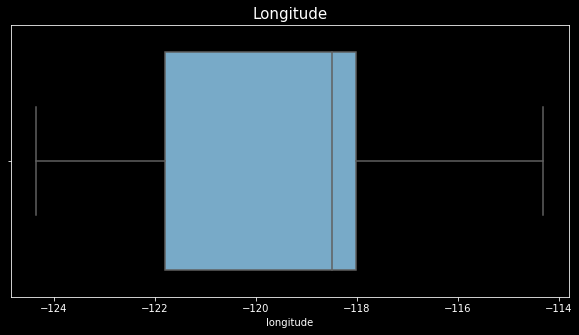

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot('longitude',data = data,palette="Blues")
plt.title('Longitude',fontsize=15)
plt.show()

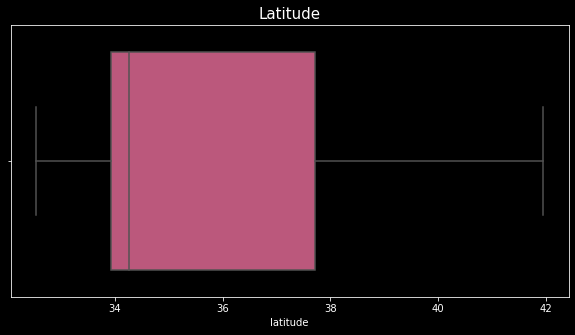

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot('latitude',data = data,palette="plasma")
plt.title('Latitude',fontsize=15)
plt.show()

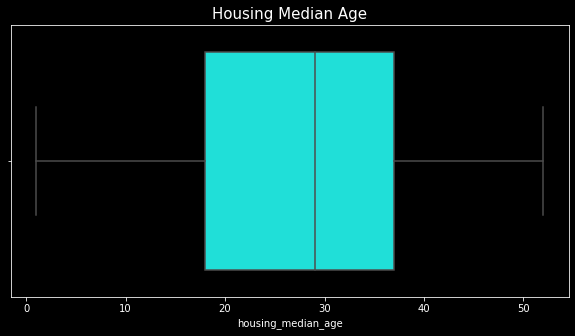

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot('housing_median_age',data = data,palette="hsv")
plt.title('Housing Median Age',fontsize=15)
plt.show()

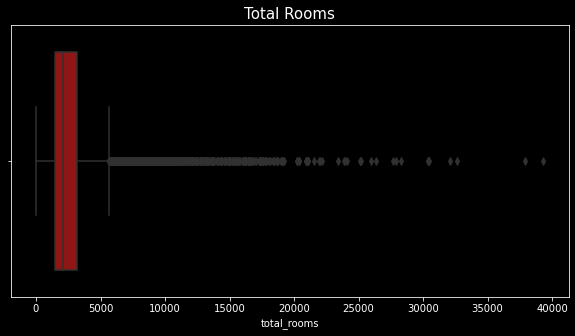

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot('total_rooms',data = data,palette="flag")
plt.title('Total Rooms',fontsize=15)
plt.show()

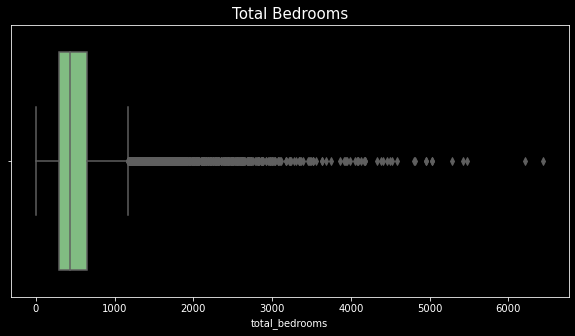

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot('total_bedrooms',data = data,palette="YlGn")
plt.title('Total Bedrooms',fontsize=15)
plt.show()

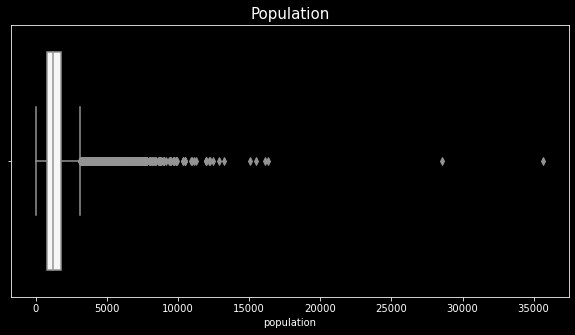

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot('population',data = data,palette="PuOr")
plt.title('Population',fontsize=15)
plt.show()

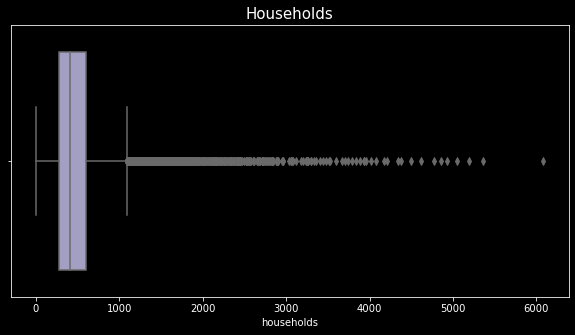

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot('households',data = data,palette="Purples")
plt.title('Households',fontsize=15)
plt.show()

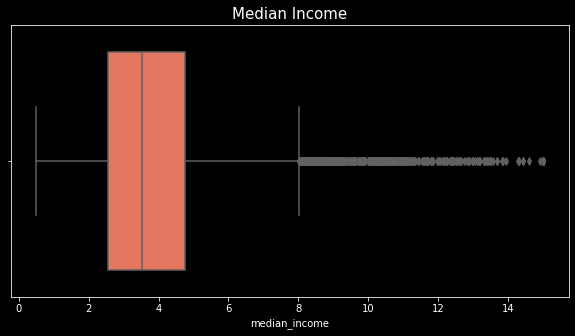

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot('median_income',data = data,palette="Reds")
plt.title('Median Income',fontsize=15)
plt.show()

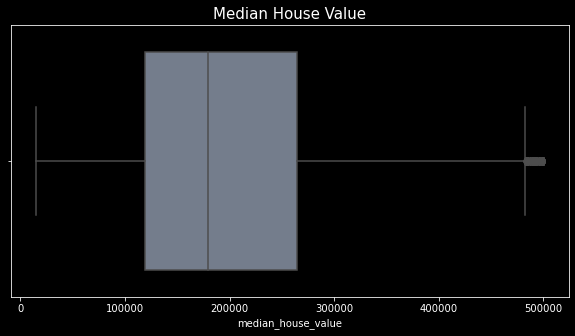

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot('median_house_value',data = data,palette="bone")
plt.title('Median House Value',fontsize=15)
plt.show()

In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Treating Outliers.
#### Like missing values we can drop the rows or columns , or replace the outliers with the  mean or median values.
#### We can drop the rows with value lower than lower whisker or upper than upper whisker.
#### Now here we replace the outliers with the lower whisker and upper whisker. These whiskers can be calculated by using inter quartile range(IQR). The formula for IQR is IQR = 3rd quantile - 1st quantile.

In [16]:
def IQR(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    return iqr,q1,q3

In [17]:
def whisker(col):
    iqr,q1,q3 = IQR(col)
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    return lower_whisker,upper_whisker

In [18]:
for col in data.columns:
    if data[col].dtype!="object":
        lw,uw = whisker(col)
        print("Feature:-{} Lower:-{} Upper:-{}".format(col,lw,uw))

Feature:-longitude Lower:--127.48499999999999 Upper:--112.32500000000002
Feature:-latitude Lower:-28.245 Upper:-43.405
Feature:-housing_median_age Lower:--10.5 Upper:-65.5
Feature:-total_rooms Lower:--1089.5 Upper:-5682.5
Feature:-total_bedrooms Lower:--230.5 Upper:-1173.5
Feature:-population Lower:--615.5 Upper:-3124.5
Feature:-households Lower:--206.0 Upper:-1090.0
Feature:-median_income Lower:--0.70675 Upper:-8.01445
Feature:-median_house_value Lower:--98300.0 Upper:-482500.0


In [19]:
def treat_outliers(value):
    lower_limit,upper_limit = whisker(col)
    data[col] = np.where(data[col]<lower_limit,lower_limit,data[col])
    data[col] = np.where(data[col]>upper_limit,upper_limit,data[col])

In [20]:
for col in data.columns:
    if data[col].dtype!="object":
        treat_outliers(col)

In [21]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.00000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2440.46557,502.538076,1335.894240,468.742426,3.801660,205991.542896
std,2.003578,2.136348,12.591805,1394.61925,287.085265,763.964234,264.981678,1.657657,113262.229289
min,-124.350000,32.540000,1.000000,2.00000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.00000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.00000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.00000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,5682.50000,1173.500000,3124.500000,1090.000000,8.014450,482500.000000


## Column with repetative value.
#### Whenever we see any case like a column consists of a maximum percent of same data or a data which is very less in percent as compare to other we can drop the entire column.

In [22]:
data.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            4790
total_bedrooms         1166
population             2914
households             1083
median_income         12210
median_house_value     3770
ocean_proximity           5
dtype: int64

#### Here other than ocean proximity all features are numeric. So ocean_proximity consists of 5 unique value out of which ISLAND consists of only 5 value counts. So by droping the rows with ISLAND in feature dosen't impact our dataset so much.

In [23]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [24]:
data.drop(data[data['ocean_proximity']=="ISLAND"].index, inplace = True) 

In [25]:
data.shape

(20428, 10)

## Non relatable data.
#### Sometimes our data set consists of feature that does not impact our data set or is not inportant or informative we can drop the column.

## Duplicate values
#### Our data set may contain some rows with exact same data values for all features , we can drop that rows to lower dataset size.

In [26]:
data.shape

(20428, 10)

In [27]:
data_remove_duplicates = pd.DataFrame.drop_duplicates(data)

In [28]:
data_remove_duplicates.shape

(20428, 10)

## Inconsistence categorical values
#### Sometimes our data contain inconsistence data strings like iSlAnD or date and time 12-03-12 , we can treat these values by converting categorical values to lower case and extracting date, day , month ,time ,etc from date data.

#### Now converting the data in ocean proximity to lower case

In [29]:
data['ocean_proximity'] = data['ocean_proximity'].str.lower()

In [30]:
data['ocean_proximity'].value_counts()

<1h ocean     9034
inland        6496
near ocean    2628
near bay      2270
Name: ocean_proximity, dtype: int64

#### Our data may contain spelling mistakes or white spaces in categorical values or measurement units in numeric values ,so can can replace white spaces or units and correct spells of categorical values.

In [31]:
data['ocean_proximity'] = data['ocean_proximity'].str.replace(" ","_")

In [32]:
data['ocean_proximity'].value_counts()

<1h_ocean     9034
inland        6496
near_ocean    2628
near_bay      2270
Name: ocean_proximity, dtype: int64